# Importing Required Libraries

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (30, 20),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# Importing Datset

In [5]:
data = pd.read_csv("groceries.csv")
data.head(10)

,Trans_ID,Item
0,1,citrus fruit
1,1,semi-finished bread
2,1,margarine
3,1,ready soups
4,2,tropical fruit
5,2,yogurt
6,2,coffee
7,3,whole milk
8,4,pip fruit
9,4,yogurt


# Plotting the Variables

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

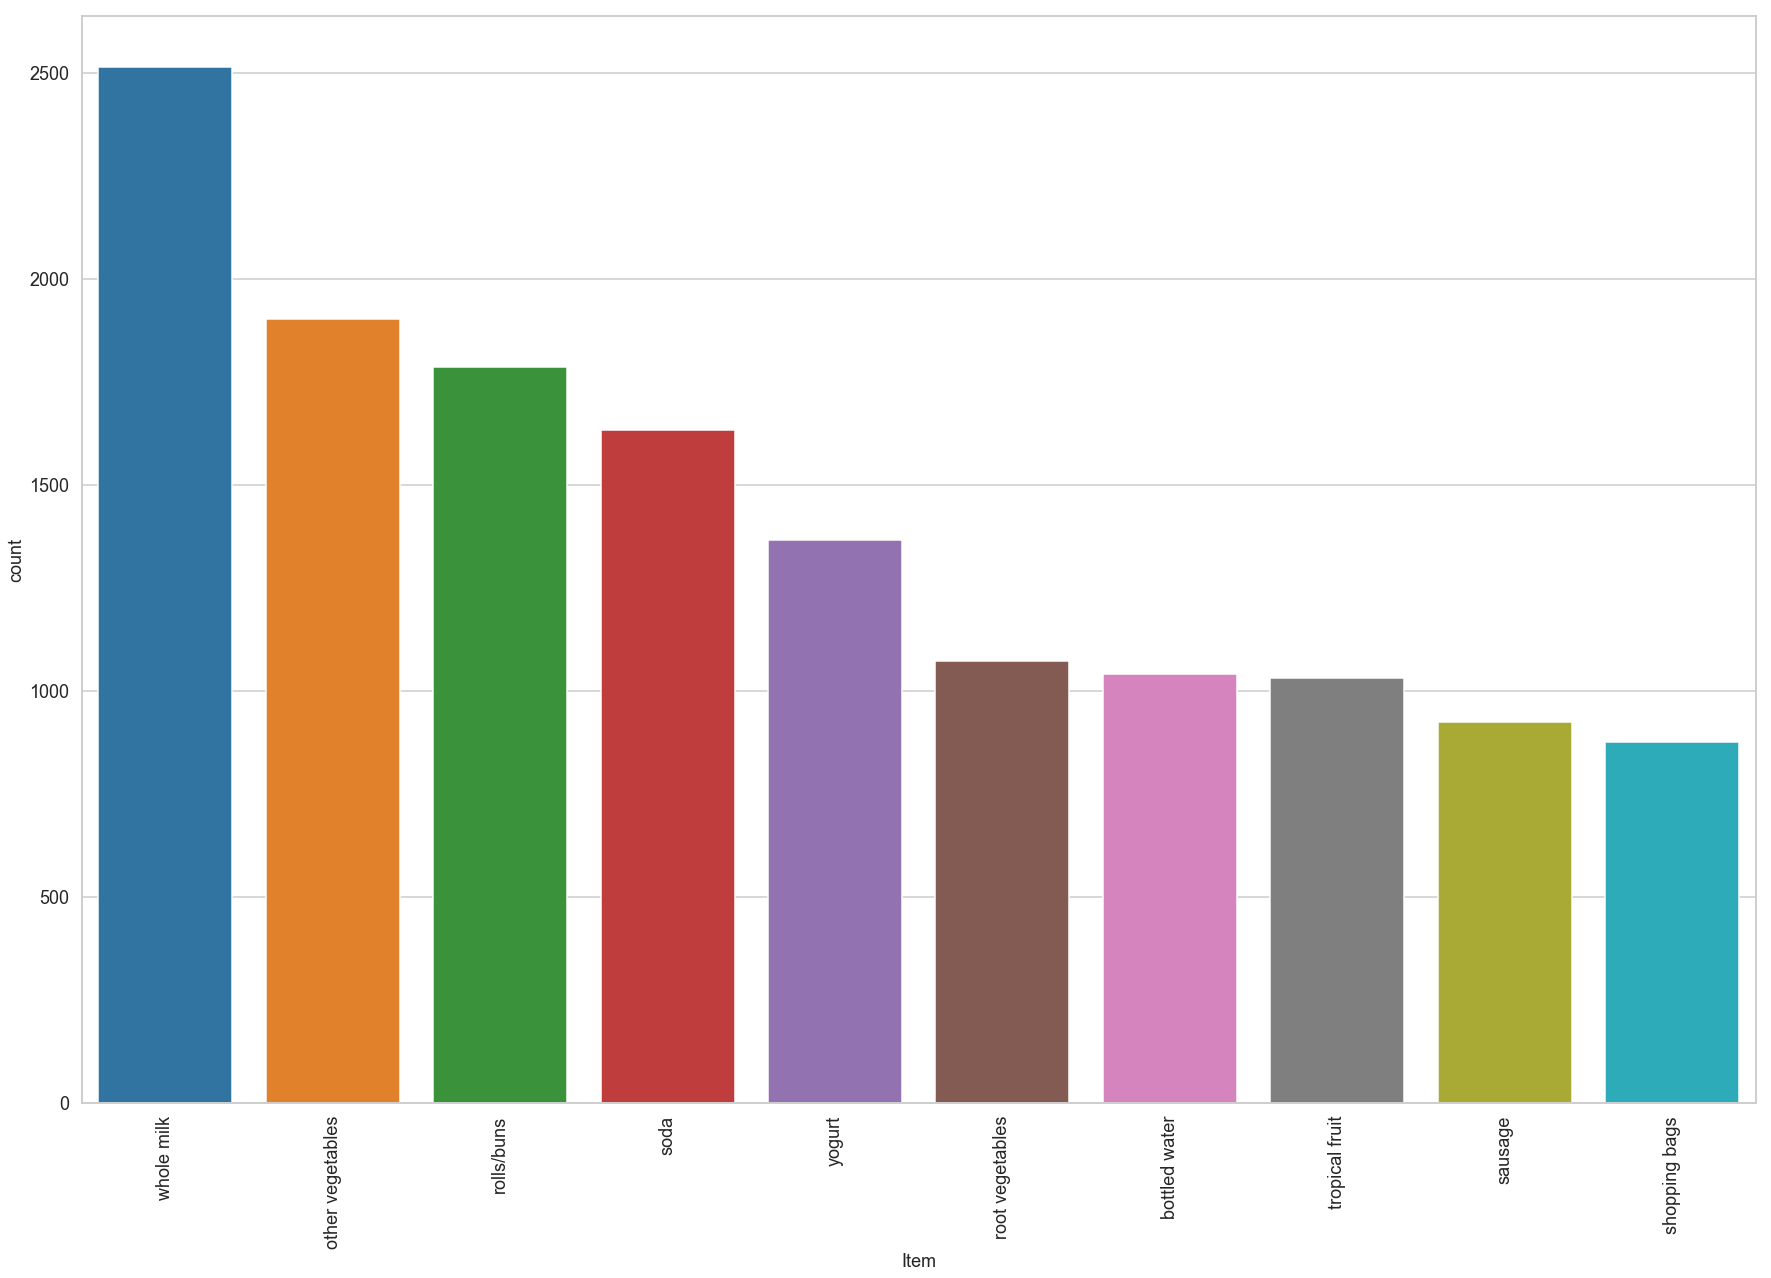

In [8]:
sns.countplot(x = 'Item', data = data, order = data['Item'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Model Building

In [9]:
df = data.groupby(['Trans_ID','Item']).size().reset_index(name='count')
basket = (df.groupby(['Trans_ID', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Trans_ID'))#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
342,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
390,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
335,"(other vegetables, butter)",(whole milk),0.019929,0.255516,0.011388,0.571429,2.236371,0.006296,1.737129
454,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
462,"(root vegetables, yogurt)",(whole milk),0.025419,0.255516,0.014133,0.556000,2.175989,0.007638,1.676766
353,"(other vegetables, domestic eggs)",(whole milk),0.020946,0.255516,0.011083,0.529126,2.070814,0.005731,1.581069
359,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003
474,"(yogurt, whipped/sour cream)",(whole milk),0.020437,0.255516,0.010574,0.517413,2.024973,0.005352,1.542694
467,"(tropical fruit, yogurt)",(whole milk),0.028775,0.255516,0.014743,0.512367,2.005227,0.007391,1.526732
437,"(other vegetables, yogurt)",(whole milk),0.042908,0.255516,0.021861,0.509479,1.993921,0.010897,1.517740
